In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 02:59:30,208] A new study created in memory with name: no-name-909531ff-ea38-44ae-8207-04d9df788a5e
[I 2025-04-27 02:59:30,424] Trial 0 finished with value: 0.9521835443037976 and parameters: {'n_neighbors': 28, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 24, 'p': 1}. Best is trial 0 with value: 0.9521835443037976.
[I 2025-04-27 02:59:30,578] Trial 1 finished with value: 0.9546518987341772 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 50, 'p': 2}. Best is trial 1 with value: 0.9546518987341772.
[I 2025-04-27 02:59:30,685] Trial 2 finished with value: 0.9623101265822784 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 20, 'p': 2}. Best is trial 2 with value: 0.9623101265822784.
[I 2025-04-27 02:59:30,784] Trial 3 finished with value: 0.9573417721518986 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 24, 'p': 1}. Best is tri

Best trial:
Accuracy: 0.9774050632911392
Best hyperparameters:  {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 17, 'p': 2}


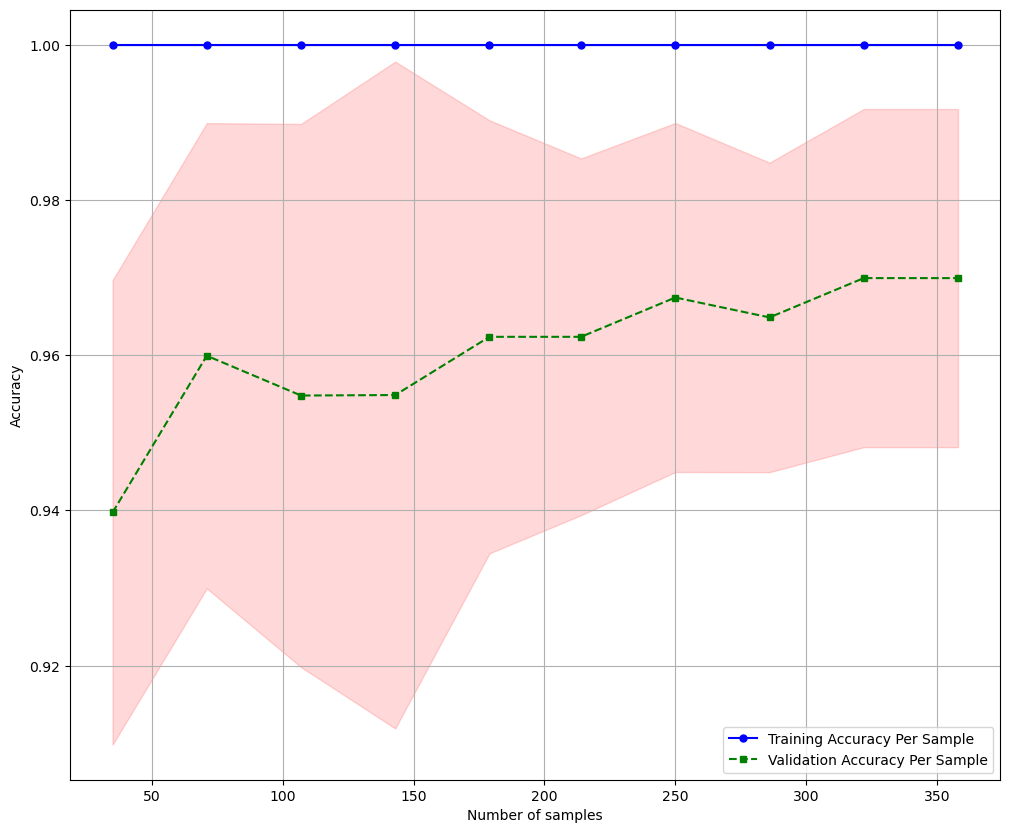

Confusion Matrix
[[ 53  11]
 [  0 107]]
Accuracy: 0.9357, Precision: 0.9068, Recall: 1.0000, F1: 0.9511, AUC:0.9477


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

helper.train_and_evaluate_model('lr', X_train_scaled, X_test_scaled, y_train, y_test)